Original Dataset with Missing Values:
                Value
Date                
2025-01-01 -0.040759
2025-01-02       NaN
2025-01-03  0.027871
2025-01-04  0.441346
2025-01-05  0.505714

Dataset After Forward Fill:
                Value
Date                
2025-01-01 -0.040759
2025-01-02 -0.040759
2025-01-03  0.027871
2025-01-04  0.441346
2025-01-05  0.505714

Dataset After Backward Fill:
                Value
Date                
2025-01-01 -0.040759
2025-01-02  0.027871
2025-01-03  0.027871
2025-01-04  0.441346
2025-01-05  0.505714

Dataset After Interpolation:
                Value  Normalized_Value
Date                                  
2025-01-01 -0.040759          0.444460
2025-01-02 -0.006444          0.460201
2025-01-03  0.027871          0.475942
2025-01-04  0.441346          0.665616
2025-01-05  0.505714          0.695144

Resampled Data (Weekly):
                Value
Date                
2025-01-05  0.185546
2025-01-12  0.703781
2025-01-19  0.943397
2025-01-26  0.762300
20

<ipython-input-1-4ee3c34eba30>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-1-4ee3c34eba30>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


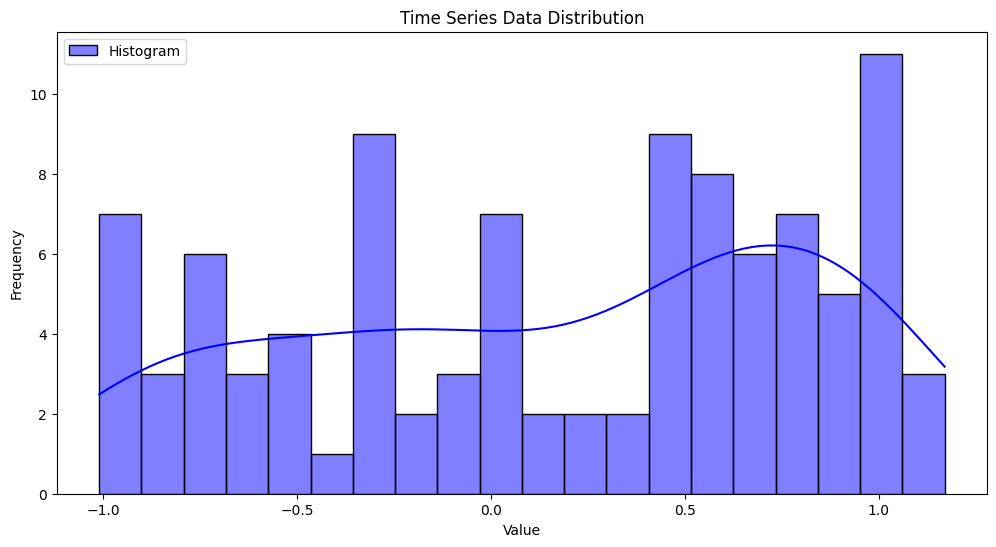

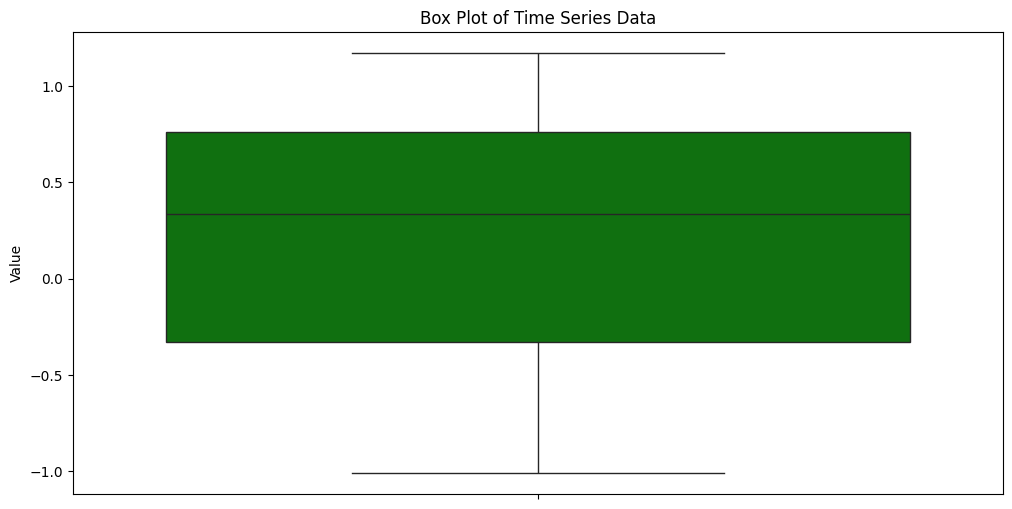

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Generating a synthetic time series dataset with missing values
def generate_time_series_data():
    date_range = pd.date_range(start='2025-01-01', periods=100, freq='D')
    data = np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.1, 100)  # Sinusoidal pattern with noise
    data[np.random.randint(0, 100, 10)] = np.nan  # Introduce missing values
    return pd.DataFrame({'Date': date_range, 'Value': data}).set_index('Date')

# Step 2: Handling Missing Data
def handle_missing_data(df):
    df_ffill = df.fillna(method='ffill')
    df_bfill = df.fillna(method='bfill')
    df_interpolated = df.interpolate(method='linear')
    return df_ffill, df_bfill, df_interpolated

# Step 3: Preprocessing Techniques
def preprocess_time_series(df):
    df_resampled = df.resample('W').mean()  # Weekly resampling
    scaler = MinMaxScaler()
    df['Normalized_Value'] = scaler.fit_transform(df[['Value']])
    return df_resampled, df

# Step 4: Running the program
def main():
    df = generate_time_series_data()
    print("Original Dataset with Missing Values:\n", df.head())

    df_ffill, df_bfill, df_interpolated = handle_missing_data(df)
    df_resampled, df_normalized = preprocess_time_series(df_interpolated)

    print("\nDataset After Forward Fill:\n", df_ffill.head())
    print("\nDataset After Backward Fill:\n", df_bfill.head())
    print("\nDataset After Interpolation:\n", df_interpolated.head())
    print("\nResampled Data (Weekly):\n", df_resampled.head())
    print("\nNormalized Data:\n", df_normalized.head())

    # Plot data using different formats
    plt.figure(figsize=(12, 6))
    sns.histplot(df_interpolated['Value'], bins=20, kde=True, color='blue', label='Histogram')
    plt.title("Time Series Data Distribution")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_interpolated, y='Value', color='green')
    plt.title("Box Plot of Time Series Data")
    plt.ylabel("Value")
    plt.show()



# Execute the program
if __name__ == "__main__":
    main()
